In [16]:
import intake
from pathlib import Path

# The Data Catalog


## Connecting to the Catalog with `sshfs`

We can use `sshfs` to mount the catalog file system on CSD3 directly onto our local machine. The following commands show how to mount the data catalog in a new folder called `data`. The second command mounts the catalog. You will need to modify the command to use your CSD3 login name.

```{note}
This assumes you already have an account on CSD3. Please follow the guide [here](https://docs.hpc.cam.ac.uk/hpc/user-guide/quickstart.html) to setup your login.
```

```bash
mkdir ~/mast-data
sshfs -o allow_other,auto_cache,reconnect ~/mast-data <your-csd3-username>@login.hpc.cam.ac.uk:/rds/project/rds-mOlK9qn0PlQ/ir-jack5
```


## Opening the Catalog


In [17]:
catalog = intake.open_catalog(Path('~/mast-data/mast/catalog.yml').expanduser())
catalog

mast:
  args:
    path: /home/lhs18285/mast-data/mast/catalog.yml
  description: The MAST Data Archive Catalog
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    version: 1


Column(width_policy='max')
    [0] Row(width_policy='max')
        [0] PNG(str)
        [1] Column(width_policy='max')
            [0] Column(name='Select Catalog')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options={'mast': <Intake c...}, size=9, value=[<Intake catalog: mast>], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='＋', width=50)
                [1] Button(name='―', width=50)
                [2] Toggle(name='🔍', width=50)
        [2] Column(width_policy='max')
            [0] Column(name='Select Data Source')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options=OrderedDict([('ABM_CALIB_S...]), size=9, value=[name: ABM_CALIB_SHOT
cont...], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='📊', width=50)
                [1] Toggle(disabled=True, name='⚙', width=50)
        [3] Column(height=240, name='Description', scroll=True, sizing_mode='stretch_width', width_policy='max')
            [0] Markdown(str)
    [1] Row(width_policy='max')
        [0] Row(height_policy='min', max_width=5000, name='Search', width_policy='max')
        [1] Column(max_width=5000, name='Add Catalog', width_policy='max')
        [2] Column(name='Plot', width_policy='max')
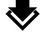

In [18]:
intake.interface.gui.GUI([catalog])

Accessing a single record for the catalog

In [19]:
catalog.ACT_C_PLA_TEMPERATURE

ACT_C_PLA_TEMPERATURE:
  args:
    fastzarr: true
    urlpath: /home/lhs18285/mast-data/mast/ACT_C_PLA_TEMPERATURE.zarr
  description: Carbon temperature
  driver: intake_xarray_datatree.intake_xarray_datatree.DataTreeSource
  metadata:
    catalog_dir: /home/lhs18285/mast-data/mast/
    description: ''
    label: Carbon temperature
    rank: 2
    shape:
    - 2
    - 32
    time_index: 0
    units: eV


Load data from the data catalog directly

In [29]:
dataset = catalog.ACT_C_PLA_TEMPERATURE.read()
print("Number for shots in dataset:", len(dataset))

Number for shots in dataset: 712


Look at the first shot in the dataset

In [30]:
dataset['28977']

DataTree('28977', parent="None")
    Dimensions:       (time: 2, major radius: 32)
    Coordinates:
      * major radius  (major radius) float32 1.018 1.031 1.044 ... 1.403 1.417 1.43
      * time          (time) float32 0.15 0.3
    Data variables:
        data          (time, major radius) float32 dask.array<chunksize=(2, 32), meta=np.ndarray>
        error         (time, major radius) float32 dask.array<chunksize=(2, 32), meta=np.ndarray>